In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from statsmodels.stats.proportion import proportions_ztest



In [45]:
from ISLP import confusion_table

In [47]:
# read dari link URL
url = 'https://raw.githubusercontent.com/alexchandra19/Proyek-ML-2023/main/Proyek%20ML/water_potability.csv?token=GHSAT0AAAAAACI4DOFR4RQVBTE42I4PMXDCZJSMVWA'
data = pd.read_csv(url)
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,0.000000,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,0.000000,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,0.000000,392.449580,19.903225,0.000000,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,0.000000,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,0.000000,402.883113,11.168946,77.488213,4.708658,1


In [48]:
# memuat deskripsi setiap kolom dataframe
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,6.019540,196.369496,22014.092526,7.122277,254.203468,426.205111,14.284970,63.112960,3.966786,0.390110
std,2.924207,32.879761,8768.570828,1.583085,146.765192,80.824064,3.308162,21.353531,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,0.000000,181.483754,2.200000,0.000000,1.450000,0.000000
25%,5.283146,176.850538,15666.690297,6.127421,240.722848,365.734414,12.065801,53.793688,3.439711,0.000000
50%,6.735249,196.967627,20927.833607,7.130299,318.660382,421.884968,14.218338,65.445962,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [49]:
# memuat korelasi setiap kolom dataframe dgn potability
data.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.032591,-0.051277,-0.010452,-0.010128,0.030879,0.034793,0.013248,-0.009120,0.020390
Hardness,0.032591,1.000000,-0.046899,-0.030054,-0.031065,-0.023915,0.003610,-0.005691,-0.014449,-0.013837
Solids,-0.051277,-0.046899,1.000000,-0.070148,-0.026671,0.013831,0.010242,-0.023065,0.019546,0.033743
Chloramines,-0.010452,-0.030054,-0.070148,1.000000,0.002513,-0.020486,-0.012653,0.014974,0.002363,0.023779
Sulfate,-0.010128,-0.031065,-0.026671,0.002513,1.000000,-0.017943,0.029329,-0.011642,0.000244,0.011542
Conductivity,0.030879,-0.023915,0.013831,-0.020486,-0.017943,1.000000,0.020966,0.016318,0.005798,-0.008128
Organic_carbon,0.034793,0.003610,0.010242,-0.012653,0.029329,0.020966,1.000000,-0.013381,-0.027308,-0.030001
Trihalomethanes,0.013248,-0.005691,-0.023065,0.014974,-0.011642,0.016318,-0.013381,1.000000,-0.019066,0.021094
Turbidity,-0.009120,-0.014449,0.019546,0.002363,0.000244,0.005798,-0.027308,-0.019066,1.000000,0.001581
Potability,0.020390,-0.013837,0.033743,0.023779,0.011542,-0.008128,-0.030001,0.021094,0.001581,1.000000


Data Cleaning & Preprocessing

In [50]:
# Menghitung jumlah data kosong pada setiap kolom
data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [51]:
# replace missing values with 0
data.fillna(0, inplace=True)
# Step 3: Save the updated DataFrame back to the same file
data.to_csv(url, index=False)  # Set index to False to avoid writing the index column

In [52]:
# menghitung jumlah data kosong pada setiap kolom
data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [53]:
print("Sudah tidak ada data kosong")

Sudah tidak ada data kosong


In [54]:
# print dataset yang telah diupdate
print(data)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0     0.000000  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246    0.000000   
2     8.099124  224.236259  19909.541732     9.275884    0.000000   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362    0.000000   
3273  9.419510  175.762646  33155.578218     7.350233    0.000000   
3274  5.126763  230.603758  11983.869376     6.303357    0.000000   
3275  7.874671  195.102299  17404.177061     7.509306    0.000000   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

p-value

In [55]:
# predictor variables (X) & response variable (y) 
X = data.drop(['Potability'], axis=1)
y = (data['Potability'] == 1)  # 1 = potable


# fit logistic regression model
X = sm.add_constant(X)  # Add an intercept term
model = sm.Logit(y, X)
results = model.fit()

# Summarize the results
summary = results.summary()
print(summary)


Optimization terminated successfully.
         Current function value: 0.666736
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:             Potability   No. Observations:                 3276
Model:                          Logit   Df Residuals:                     3266
Method:                           MLE   Df Model:                            9
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                0.003082
Time:                        18:32:08   Log-Likelihood:                -2184.2
converged:                       True   LL-Null:                       -2191.0
Covariance Type:            nonrobust   LLR p-value:                    0.1410
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.6515      0.454     -1.435      0.151      -1.541       0.238
ph            

Logistic Regression Model

In [86]:
# split data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# split data into validation & train
X_train, X_val_test, y_train, y_val_test = train_test_split(X_train, y_train, test_size=0.35, random_state=100)

glm= sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm.fit()

# Predict probabilities for the testing data
probs = results.predict(exog=X_test)

In [87]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

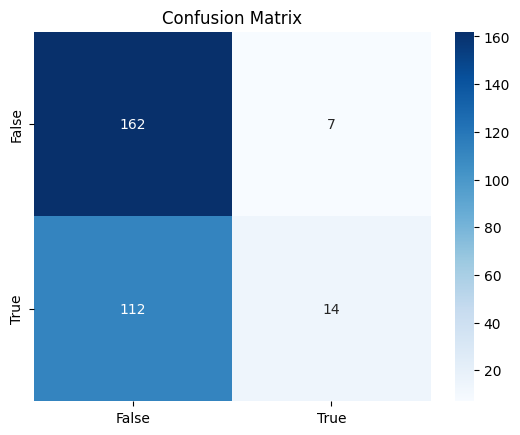

In [89]:
import seaborn as sns
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Create a confusion matrix with labeled classes
confusion = confusion_matrix(y_test, y_pred)

# Get the unique class labels from y (assuming they are in alphabetical order)
class_labels = sorted(set(y_test))

# Plot the confusion matrix with values
sns.heatmap(pd.DataFrame(confusion, index=class_labels, columns=class_labels), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.show()


Hypothesis testing

In [90]:
contingency_table = pd.crosstab(data['Potability'], columns='count')

# Extract the counts for potable (1) and non-potable (0) water
potable_count = contingency_table.loc[1, 'count']
non_potable_count = contingency_table.loc[0, 'count']

# Perform a two-sample proportion test
stat, p_value = proportions_ztest([potable_count, non_potable_count], [potable_count + non_potable_count], alternative='two-sided')

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine statistical significance
print("P-value = ", p_value)
if p_value < alpha:
    print(f"Tolak H0. The proportions of potable and non-potable water are significantly different")
else:
    print(f"Terima H0. There is no significant difference in the proportions of potable and non-potable water")

P-value =  8.450463443404447e-71
Tolak H0. The proportions of potable and non-potable water are significantly different


K-Fold

In [91]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

# Load your 'water portability' dataset
# Replace this part with your dataset loading code
# X should contain the feature matrix, and y should contain the target variable
X, y = X_test, y_test

# Calculate the ideal test condition
kf = KFold(n_splits=len(X), shuffle=True, random_state=1)
ideal = np.mean(cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=kf))
print(f'Ideal: {ideal:.3f}')

# Define folds to test
folds = range(2, 11)

# Record mean and min/max of each set of results
means, mins, maxs, mses = [], [], [], []

# Evaluate each k value
for k in folds:
    # Define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=1)

    # Evaluate k value
    accuracies = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=cv)
    k_mean, k_min, k_max = accuracies.mean(), accuracies.min(), accuracies.max()
    
    # Calculate and store Mean Squared Error (MSE)
    squared_errors = (1 - accuracies) ** 2  # Convert accuracy to error
    mse = squared_errors.mean()
    mses.append(mse)

    means.append(k_mean)
    mins.append(k_min)
    maxs.append(k_max)

    # Report performance
    print(f'folds={k}, accuracy={k_mean:.3f} ({k_min:.3f},{k_max:.3f}), MSE={mse:.3f}')


Ideal: 0.590
folds=2, accuracy=0.620 (0.612,0.628), MSE=0.144
folds=3, accuracy=0.627 (0.586,0.673), MSE=0.140
folds=4, accuracy=0.627 (0.595,0.671), MSE=0.140
folds=5, accuracy=0.620 (0.576,0.678), MSE=0.145
folds=6, accuracy=0.603 (0.490,0.673), MSE=0.161
folds=7, accuracy=0.617 (0.405,0.738), MSE=0.159
folds=8, accuracy=0.597 (0.514,0.667), MSE=0.164
folds=9, accuracy=0.611 (0.455,0.788), MSE=0.162
folds=10, accuracy=0.617 (0.433,0.800), MSE=0.155


LDA

In [92]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Fit the LDA model on the training data
lda.fit(X_train, y_train)

# Perform dimensionality reduction on both the training and test data
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

In [93]:
lda.means_

array([[0.        , 0.45310592, 0.56662596, 0.38912353, 0.47387684,
        0.54721943, 0.43059806, 0.51887893, 0.53609466, 0.50492623],
       [0.        , 0.4745984 , 0.5867932 , 0.40629908, 0.45483934,
        0.55978716, 0.43983451, 0.51092106, 0.55992027, 0.51401778]])

In [94]:
lda.priors_

array([0.59284116, 0.40715884])

In [95]:
# Perform classification using a classifier (e.g., Logistic Regression)
from sklearn.linear_model import LogisticRegression

# Initialize the classifier
classifier = LogisticRegression()

# Fit the classifier on the transformed training data
classifier.fit(X_train_lda, y_train)

# Make predictions on the transformed test data
y_pred = classifier.predict(X_test_lda)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.61


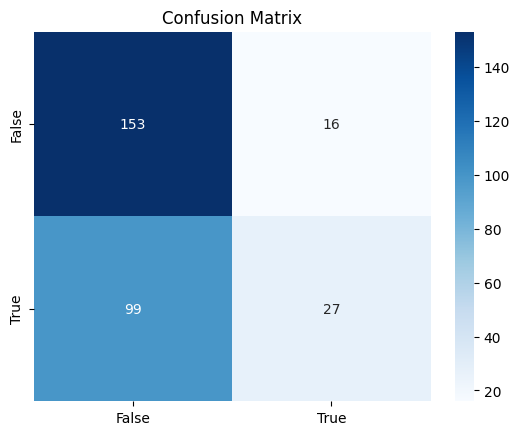

In [96]:
import seaborn as sns
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Create a confusion matrix with labeled classes
confusion = confusion_matrix(y_test, y_pred)

# Get the unique class labels from y (assuming they are in alphabetical order)
class_labels = sorted(set(y_test))

# Plot the confusion matrix with values
sns.heatmap(pd.DataFrame(confusion, index=class_labels, columns=class_labels), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.show()

QDA

In [97]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize the QDA model
qda = QuadraticDiscriminantAnalysis()

# Fit the QDA model on the training data
qda.fit(X_train, y_train)

# Make predictions on the test data
y_pred = qda.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.57


C:\Users\Evelyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Evelyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\discriminant_analysis.py:951: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\Evelyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\discriminant_analysis.py:951: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\Evelyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\discriminant_analysis.py:954: RuntimeWarning: divide by ze

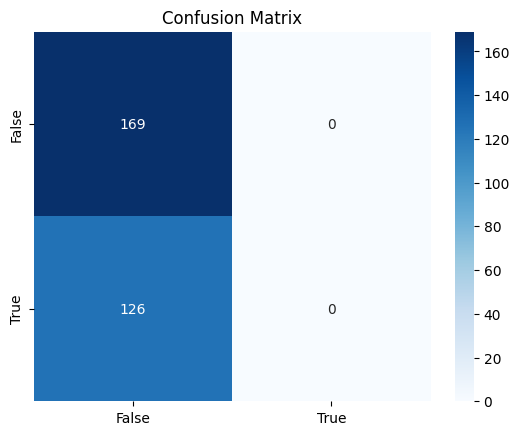

In [98]:
import seaborn as sns
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Create a confusion matrix with labeled classes
confusion = confusion_matrix(y_test, y_pred)

# Get the unique class labels from y (assuming they are in alphabetical order)
class_labels = sorted(set(y_test))

# Plot the confusion matrix with values
sns.heatmap(pd.DataFrame(confusion, index=class_labels, columns=class_labels), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.show()

Naive Bayes

In [99]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize the Gaussian Naive Bayes model
nb = GaussianNB()

# Fit the model on the training data
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.58


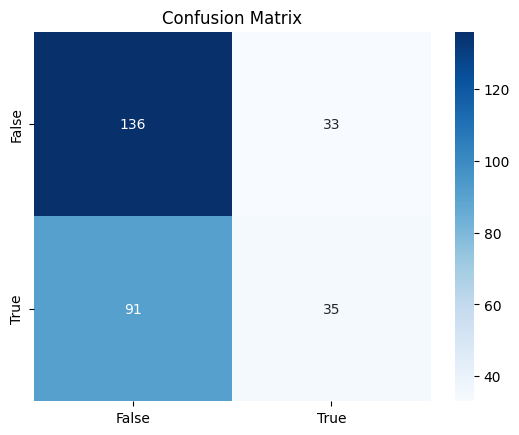

In [100]:
import seaborn as sns
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Create a confusion matrix with labeled classes
confusion = confusion_matrix(y_test, y_pred)

# Get the unique class labels from y (assuming they are in alphabetical order)
class_labels = sorted(set(y_test))

# Plot the confusion matrix with values
sns.heatmap(pd.DataFrame(confusion, index=class_labels, columns=class_labels), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [101]:
nb.predict_proba(X_test)[:5]

array([[0.6228949 , 0.3771051 ],
       [0.6726631 , 0.3273369 ],
       [0.7008285 , 0.2991715 ],
       [0.64363404, 0.35636596],
       [0.3773924 , 0.6226076 ]])

K-NN

In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize the KNN classifier (you can specify the number of neighbors with the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5) 

X_train, X_test = [np.asarray(X) for X in [X_train, X_test]]

# Fit the KNN model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.57


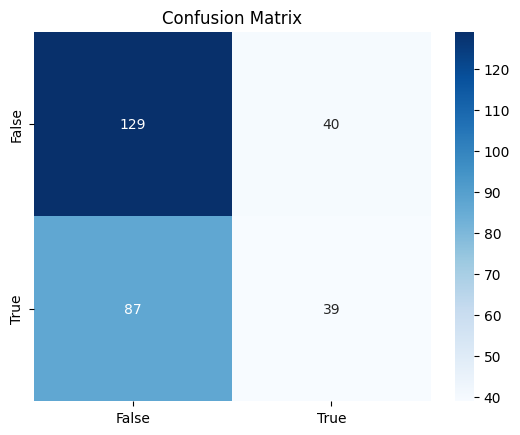

In [105]:
import seaborn as sns
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Create a confusion matrix with labeled classes
confusion = confusion_matrix(y_test, y_pred)

# Get the unique class labels from y (assuming they are in alphabetical order)
class_labels = sorted(set(y_test))

# Plot the confusion matrix with values
sns.heatmap(pd.DataFrame(confusion, index=class_labels, columns=class_labels), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.show()